# Data Acquisition

In [1]:
# Import functions
import pandas as pd
import numpy as np
import math
import os
import acquire
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import random
random.seed(123)

import prepare
import explore

### Acquire the data

In [2]:
# Load in primary dataset.
df = pd.read_csv('train.csv', usecols=[1,2,3,4,5,6,7,8,9])

### Training dataset
To reduce the memory size of our training data, we selected a random sample of 100,000 students from `train.csv`.
1. Select 100,000 user ids from `train.csv` to use as our train dataset.
2. Cast numeric column data types using an appropriate precision to reduce memory size.

### Sample training data
- Selecting 100_000 users.

In [3]:
# Find all users with more than 10 rows.
user_ids = df['user_id'].value_counts()[df['user_id'].value_counts() > 10].index.to_list()

# Select a random sample of 100_000 user_ids.
sampled_ids = random.sample(user_ids, 100_000)
len(sampled_ids)

100000

In [4]:
def sampled_users(df):
    '''
    This function accepts data from `train.csv` and
    returns a random sample of 100_000 user_ids.
    '''
    user_ids = df['user_id'].value_counts()[df['user_id'].value_counts() > 10].index.to_list()
    sampled_ids = random.sample(user_ids, 100_000)
    return sampled_ids

In [5]:
data = df.loc[df['user_id'].isin(sampled_ids)]

# We have 100_000 users!!!!
data.user_id.nunique()

100000

### Casting data types

In [6]:
def datatype_converter():
    '''
    This function returns a dictionary of column names and data types to convert.
    '''
    
    train_data_types_dict = {
    'timestamp': np.int64,
    'user_id': np.int32,
    'content_id': np.int16,
    'content_type_id': np.int16,
    'task_container_id' : np.int16,
    'user_answer' : np.int8,
    'answered_correctly': np.int8,
    'prior_question_elapsed_time': np.float16
    }
    
    lectures_data_types_dict = {
    'lecture_id' : np.int16,
    'tag' : np.int8,
    'part' : np.int8
    }

    questions_data_types_dict = {
    'question_id' : np.int16,
    'bundle_id' : np.int16,
    'part' : np.int8
    }
    
    
    return train_data_types_dict, lectures_data_types_dict, questions_data_types_dict

Create a function to reproduce the modified training set.

In [7]:
def sampled_train():
    '''
    This function selects a random sample of 100_000 users from the `train.csv` dataset.
    Returns a dataframe of 100_000 users that have more than 10 rows of data.
    
    
    Parameters
    ----------
    None
    
    
    Returns
    -------
    data : pandas.core.frame.DataFrame
        A pandas dataframe of 100,000 randomly selected
        users.
    '''
    train_dtypes, _, _ = datatype_converter()
    
    if os.path.isfile('sampled_train.csv'):
        return pd.read_csv('sampled_train.csv',
                           index_col=False,
                           dtype=train_dtypes)
    else:
        
    # Read in `train.csv` data
        df = pd.read_csv('train.csv', dtype=train_dtypes, usecols=[1,2,3,4,5,6,7,8,9])

        sampled_ids = sampled_users(df)

        sampled_data = df.loc[df['user_id'].isin(sampled_ids)]

        # Cache local file of sampled data.
        sampled_data.to_csv('sampled_train.csv', index=False)
    
    # Return the dataframe
    return sampled_data

In [8]:
# Test the function.
df_train = sampled_train()
# It works.
df_train.user_id.value_counts()

# Check our data types and memory usage.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25745784 entries, 46 to 101229974
Data columns (total 9 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   timestamp                       int64  
 1   user_id                         int32  
 2   content_id                      int16  
 3   content_type_id                 int16  
 4   task_container_id               int16  
 5   user_answer                     int8   
 6   answered_correctly              int8   
 7   prior_question_elapsed_time     float16
 8   prior_question_had_explanation  object 
dtypes: float16(1), int16(3), int32(1), int64(1), int8(2), object(1)
memory usage: 933.0+ MB


### Merge datasets together

In [9]:
_, lecture_dtypes, question_dtypes = datatype_converter()

df_lectures = pd.read_csv('lectures.csv', dtype=lecture_dtypes)
df_questions = pd.read_csv('questions.csv', dtype=question_dtypes)

# Left join df_train and df_lectures using `content_id` as the primary key.
df_merged = df_train.merge(df_lectures, left_on='content_id', right_on='lecture_id', how='left')

# Left join df_merged and df_questions using `content_id` as the primary key.
df_data = df_merged.merge(df_questions, left_on='content_id', right_on='question_id', how='left')

df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25745784 entries, 0 to 25745783
Data columns (total 18 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   timestamp                       int64  
 1   user_id                         int32  
 2   content_id                      int16  
 3   content_type_id                 int16  
 4   task_container_id               int16  
 5   user_answer                     int8   
 6   answered_correctly              int8   
 7   prior_question_elapsed_time     float16
 8   prior_question_had_explanation  object 
 9   lecture_id                      float64
 10  tag                             float64
 11  part_x                          float64
 12  type_of                         object 
 13  question_id                     float64
 14  bundle_id                       float64
 15  correct_answer                  float64
 16  part_y                          float64
 17  tags                     

In [10]:
# Testing if the function works.
import acquire

df = acquire.get_riiid_data()
df.head()

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_id,tag,lecture_part,type_of,question_id,bundle_id,correct_answer,question_part,tags
0,0,115,5692,0,1,3,1,NaN,NaN,<NA>,<NA>,<NA>,NaN,5692,5692,3.0,5,151
1,56943,115,5716,0,2,2,1,36992.0,False,<NA>,<NA>,<NA>,NaN,5716,5716,2.0,5,168
2,118363,115,128,0,0,0,1,55008.0,False,<NA>,<NA>,<NA>,NaN,128,128,0.0,1,131 149 92
3,131167,115,7860,0,3,0,1,19008.0,False,<NA>,<NA>,<NA>,NaN,7860,7860,0.0,1,131 104 81
4,137965,115,7922,0,4,1,1,11000.0,False,<NA>,<NA>,<NA>,NaN,7922,7922,1.0,1,131 149 92


### Split the data into train, validate, and test

In [11]:
train = pd.DataFrame()
validate = pd.DataFrame()
test = pd.DataFrame()

# Set up the train size
train_size = 0.8
validate_size = 0.1

sampled_ids = df.user_id.unique()

In [ ]:
for user in sampled_ids:
    data = df.loc[df['user_id'] == user]
    n = data.shape[0]

    train_end_index = int(train_size * n)
    validate_end_index = train_end_index + int(validate_size * n)

    df_train = data.iloc[:train_end_index]
    df_validate = data.iloc[train_end_index:validate_end_index]
    df_test = data.iloc[validate_end_index:]

    train = pd.concat([train, df_train])
    validate = pd.concat([validate, df_validate])
    test = pd.concat([test, df_test]) 

In [ ]:
train.to_csv('sampled_trainset.csv', index=False)
validate.to_csv('validate.csv', index=False)
test.to_csv('test.csv', index=False)

type(train)

# Exploration

Four features I will explore:
1. Running accuracy within a bundle
2. Question Tag Accuracy
3. Tag_#
4. Cumulative user accuracy using Exponentially Weighted Mean

In [2]:
train = pd.read_csv('sampled_trainset.csv')
validate = pd.read_csv('validate.csv')
test = pd.read_csv('test.csv')

train, validate, test, train_s, validate_s, test_s = prepare.prep_riiid(train, validate, test)

train.head()

,timestamp,user_id,content_id,task_container_id,answered_correctly,question_had_explanation,user_acc_mean,user_lectures_running_total,q_time,avg_user_q_time,...,bundle_id,part,tags,tag_count,mean_bundle_accuracy,mean_part_accuracy,mean_content_accuracy,mean_task_accuracy,mean_tagcount_accuracy,mean_tags_accuracy
0,0,24600,7900,0,1,False,0.275000,0,25379.0,70525.0,...,7900,1,131 93 81,3,0.82,0.74,0.82,0.68,0.68,0.78
1,25379,24600,7876,1,0,False,0.275000,0,24758.0,70525.0,...,7876,1,10 94 92,3,0.41,0.74,0.41,0.53,0.68,0.49
2,50137,24600,175,2,1,False,0.275000,0,20044.0,70525.0,...,175,1,9 10 92,3,0.36,0.74,0.36,0.44,0.68,0.52
3,0,128919,7900,0,1,False,0.333333,0,22862.0,60393.0,...,7900,1,131 93 81,3,0.82,0.74,0.82,0.68,0.68,0.78
4,22862,128919,7876,1,0,False,0.333333,0,24620.0,60393.0,...,7876,1,10 94 92,3,0.41,0.74,0.41,0.53,0.68,0.49


### Correlations between the features and the target variable

In [14]:
train.corr()['answered_correctly'].sort_values(ascending=False)

answered_correctly             1.000000
mean_content_accuracy          0.371355
mean_bundle_accuracy           0.326742
user_acc_mean                  0.234599
mean_tags_accuracy             0.225834
mean_task_accuracy             0.136495
mean_part_accuracy             0.101206
mean_tagcount_accuracy         0.085828
tag_count                      0.083321
task_container_id              0.056813
user_lectures_running_total    0.032799
timestamp                      0.026536
user_id                       -0.000344
q_time                        -0.011355
content_id                    -0.020392
question_id                   -0.020392
bundle_id                     -0.020394
avg_user_q_time               -0.022674
part                          -0.072469
Name: answered_correctly, dtype: float64

### `bundle_id`

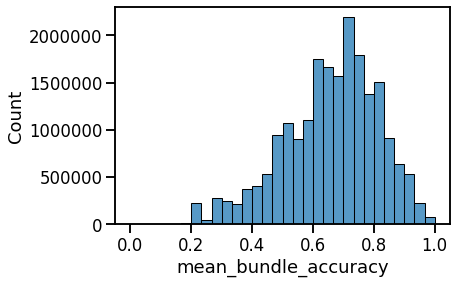

In [15]:
sns.set_context('talk')

sns.histplot(data=train, x='mean_bundle_accuracy', bins=30)

# Hypothesis Testing
---
## Hypothesis Test
### Question accuracy is dependent on the type of question asked.

Test: Chi2 Test<br>
$H_0$ Whether a user answers a question correctly is independent of the type of question being asked.<br>
$H_a$ Whether a user answers a question correctly is dependent upon the type of question being asked.

In [16]:
confidence_interval = 0.95 
alpha = 1 - confidence_interval

# Contingency table
table = pd.crosstab(train.answered_correctly, train.part)
chi2, p, dof, expected = stats.chi2_contingency(table)


if p < alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
    
print(p)

Dependent (reject H0)
0.0


- P is less than alpha so we <strong>reject</strong> the null hypothesis that answering a question correctly is independent of the type of question being asked. (Different parts of the TOEIC exam)

- The 7 parts of the TOEIC exam require the user to answer questions with different formats: Pictures, Listening to conversations, Reading Conversations, Filling in Incomplete Sentences, etc. Depending on which part the user is answering questions...

# Modeling

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
import lightgbm as lgb

In [4]:
# Split train, validate, and test into X_set and y_sets
X_train = train_s[['user_acc_mean', 'mean_content_accuracy']].copy()
y_train = train_s['answered_correctly'].copy()

X_validate = validate_s[['user_acc_mean', 'mean_content_accuracy']].copy()
y_validate = validate_s['answered_correctly'].copy()

X_test = test_s[['user_acc_mean', 'mean_content_accuracy']].copy()
y_test = test_s['answered_correctly'].copy()

In [ ]:
names = ["Linear SVM"]


classifiers = [
    SVC()]

param_grid = [{'gamma': [0.001, 0.01, 0.1],
               'C': [0.001, 0.01, 0.1]}]

# iterate over classifiers
for name, clf, param_grid in zip(names, classifiers, param_grid):

    # Set up a progress indicator        
    print(f"Currently running on model {name}") 

    # Fit on the train dataset        
    clf = GridSearchCV(clf, param_grid=param_grid, cv=5, scoring='roc_auc')
    clf.fit(X_train, y_train)

Currently running on model Linear SVM


In [ ]:
clf.best_score_

In [ ]:
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=[0])
validate_data = lgb.Dataset(X_validate, label=y_validate)

parameters = {
    'application': 'binary',
    'metric': 'auc'
}

# Predict on validate
model = lgb.train(parameters,
                  train_data,
                  valid_sets=validate_data,
                  verbose_eval=100,
                  num_boost_round=10000,
                  early_stopping_rounds=10)

y_pred = model.predict(X_validate)

lgb.plot_importance(model)
plt.show()

# Appendix

## `mean_container_part_accuracy`

### Investigating the usefulness of `mean_container_part_accuracy`

In [ ]:
unique_users_per_container = train.groupby(['part',
                                            'task_container_id',
                                            'bundle_id'])\
                            .user_id\
                            .nunique()\
                            .reset_index()

unique_users_per_container['mean_container_part_accuracy'] = train.groupby(['part',
                                                                            'task_container_id',
                                                                            'bundle_id'])\
                                                            .answered_correctly\
                                                            .mean().reset_index(drop=True)

part_mean_accuracy = train.groupby('part').answered_correctly.mean()

In [ ]:
container_data = unique_users_per_container.merge(part_mean_accuracy, on='part')

In [ ]:
# 5 million questions answered by a single user.
one_user = (container_data.user_id == 1).sum()
print(one_user)

In [ ]:
# 1 million questions answered by two users.
two_users = (container_data.user_id == 2).sum()
print(two_users)

In [ ]:
# 500k questions answered by three users.
three_users = (container_data.user_id == 3).sum()
print(three_users)

In [ ]:
total = (one_user + two_users + three_users).sum()

print(f'{total:,}')

In [ ]:
print(f'{total/train.shape[0]:0.0%}')

In [ ]:
sns.set_context('talk')
plt.figure(figsize=(13, 7))

sns.histplot(data=train,
             x='mean_container_part_accuracy',
             hue='is_reading',
             palette='Set1',
             bins=30);

In [ ]:
train.groupby(by=['task_container_id', 'bundle_id', 'part'])['answered_correctly']\
            .agg(['count', 'mean'])\
            .reset_index()\
            .sort_values(by='count', ascending=False)

In [ ]:
sns.set_context('talk')

sns.relplot(data=train.sample(1000),
            x="mean_container_part_accuracy",
            y="user_acc_mean",
            col="part",
            col_wrap=4,
            hue="answered_correctly",
            style="answered_correctly",
            kind="scatter"
)

In [ ]:
sns.jointplot(data=train.sample(1000),
              x="mean_container_part_accuracy",
              y="user_acc_mean",
              col='part',
              col_wrap=4,
              hue="answered_correctly",
              kind="kde")

```python
data = pd.DataFrame()

for id_ in train.user_id.unique()[10:15]:
    user_data = train['answered_correctly'].loc[train.user_id == id_]
    id_num = train['user_id'].loc[train.user_id == id_]
    user_ewm = pd.concat([id_num, user_data.ewm(3).mean()], axis=1)
    data = pd.concat([data, user_ewm])

for user in data.user_id.unique():
    data['answered_correctly'].loc[train.user_id == user].plot()

user = train.loc[train.user_id == 24600]

user.head()

# The culmulative total of questions answered correctly by a single user.
user.answered_correctly.cumsum()

# Number of questions a single user has answered
len(user)

user.answered_correctly.cumsum()/range(1, len(user.answered_correctly)+1)

# Calculating the cumulative accuracy of a single user
plt.scatter(x=range(0, len(user.timestamp)),
            y=user.answered_correctly.cumsum()
              / range(1, len(user.answered_correctly)+1))

user.answered_correctly

user.answered_correctly.ewm(3).mean().plot()
user.answered_correctly.ewm(7).mean().plot()
user.answered_correctly.ewm(10).mean().plot()

set_user = 0
counter = 0

for index, row in train[:5].iterrows():
    user = row['user_id']
    if set_user == 0:
        current_user = row['user_id']
        counter += 1
    elif user != current_user:
        counter = 0
    elif user == current_user:
        counter += 1
        
print(counter)
```

In [ ]:
def split_users(df, train_size=.8, validate_size=.1, test_size=.1, sample=True, n=100_000):
    '''
    This function accepts the merged dataframe from acquire.get_riiid_data()
    and returns train, validate and test sets.
    '''
    # Set a random seed to reproduce splits
    random.seed(123)
    
    if sample == True:
        # Gather a random sample of 100_000 user ids
        user_ids = random.sample(list(df['user_id'].unique()), n)
    else:
        # Gather all user ids
        user_ids = list(df['user_id'].unique())
    
    # Calculate the number of users
    total_num = len(user_ids)
    
    # Calculate the number of users in train, validate. Remaining users go in test
    train_num = int(total_num*train_size)
    validate_num = math.ceil(total_num*validate_size)
    
    # Randomly select 80% of the users to be in train.
    train_ids = random.sample(user_ids, train_num)
    
    # Remove user_ids assigned to the training set.
    remaining_val_test_users = list(set(user_ids) - set(train_ids))
    
    # Assign the remaining user ids to validate and test.
    validate_ids = random.sample(remaining_val_test_users, validate_num)
    test_ids = list(set(remaining_val_test_users) - set(validate_ids))
    
    # Return the users assigned to train, validate, and test
    return train_ids, validate_ids, test_ids


def train_validate_test(df, sampled=True):
    '''

    '''
    train_ids, validate_ids, test_ids = split_users(df, sample=sampled)

    train = df.loc[df['user_id'].isin(train_ids)]
    validate = df.loc[df['user_id'].isin(validate_ids)]
    test = df.loc[df['user_id'].isin(test_ids)]

    return train, validate, test

In [ ]:
train, validate, test = train_validate_test(acquire.get_riiid_data())

train.to_csv('sampled_train.csv', index=False)
validate.to_csv('sampled_validate.csv', index=False)
test.to_csv('sampled_test.csv', index=False)

train.info()

# Create a function to split data using Quasi-GroupKFold method
The way our data is currently split for MVP:
- 100,000 randomly selected users that have more that 10 interactions with Riiid's Knowledge tracing application.
- Each user has _sequential_ data, indicated by the variable `timestamp`.
- Data is split using a percentage-based method.
- 0% - 80% of a users data is the training set.
- 80% - 90% of a users data is in the validation set.
- 90% - 100% of a users data is in the test set.

The way we split the data is important. As we currently have our splits, several issues arise that impact our data exploration and modeling performance.
- Spliting the data using a percentage-based method removes questions and lectures from our training data. If a model encounters a question it has never seen before, how can it accurately model reality? We need to have all questions appear at least once in our dataset.
    - If this was _purely_ a time series problem, that would be fine.
- The training set uses 80% of a users data, this impacts our statistical analysis. If we have _all_ of a users data, we can correctly calculate population statistics from a _sample_ of users. We can then compare statistics on a user/grouped level with the population.

What is the solution?

> <strong>Splitting by users!</strong>

## Splitting by users
How does this solve our exploration and modeling issues?
> <strong>By creating users the model has never seen before!</strong>

This simulates _new_ users interacting with Riiid's Knowledge Tracing Application.

In [ ]:
# Check for even splits
print(len(users) == sum([train_users, validate_users, test_users]))

print(len(users))
print(sum([train_users, validate_users, test_users]))

### Test a method to split users into seperate datasets

### Create a function to reproduce data splits

In [ ]:
def split_users(df, train_size=.8, validate_size=.1, test_size=.1):
    '''
    This function accepts the merged dataframe from acquire.get_riiid_data()
    and returns train, validate and test sets.
    '''
    # Set a random seed to reproduce splits
    random.seed(123)
    
    # Gather all user ids
    user_ids = list(df['user_id'].unique())
    total_num = len(user_ids)
    
    # Calculate the number of users in train, validate, and test.
    train_num = int(total_num*train_size)
    validate_num = math.ceil(total_num*validate_size)
    test_num = math.ceil(total_num*test_size)
    
    # Randomly select 80% of the users to be in train.
    train_ids = random.sample(user_ids, train_num)
    
    # Remove user_ids assigned to the training set.
    remaining_val_test_users = list(set(user_ids) - set(train_ids))
    
    # Assign the remaining user ids to validate and test.
    validate_ids = random.sample(remaining_val_test_users, validate_num)
    test_ids = list(set(remaining_val_test_users) - set(validate_ids))
    
    # Return the users assigned to train, validate, and test
    return train_ids, validate_ids, test_ids

In [ ]:
train_ids, validate_ids, test_ids = split_users(df_data)

# Filter user ids into train, validate, and test dataframes.
train = df_data.loc[df_data['user_id'].isin(train_ids)]
validate = df_data.loc[df_data['user_id'].isin(validate_ids)]
test = df_data.loc[df_data['user_id'].isin(test_ids)]

# Save these files as _kfold to distinguish as GroupKFold Split data.
train.to_csv('train_kfold.csv', index=False)
validate.to_csv('validate_kfold.csv', index=False)
test.to_csv('test_kfold.csv', index=False)

train.info()